In [8]:
import numpy as np
from PIL import Image
import sys

import tiff_file 

import io 
import sys
import csv

import os
import glob #glob is helpful for searching for filenames or directories
import pickle #for saving data

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm

In [9]:
def floodfill(array, x, y, rows, cols):
    if array[x,y] == -1:
        array[x,y] = -2 #part of the current cluster
        currclustersize = 1
        if x > 0:
            currclustersize += floodfill(array, x-1, y, rows, cols)
        if x < rows - 1:
            currclustersize += floodfill(array, x+1, y, rows, cols)
        if y > 0:
            currclustersize += floodfill(array, x, y-1, rows, cols)
        if y < cols - 1:
            currclustersize += floodfill(array, x, y+1, rows, cols)
        return currclustersize
    return 0

def markcluster(array, x, y, rows, cols, clustersize):
    if array[x,y] == -2:
        array[x,y] = clustersize
        if x > 0:
            markcluster(array, x-1, y, rows, cols, clustersize)
        if x < rows - 1:
            markcluster(array, x+1, y, rows, cols, clustersize)
        if y > 0:
            markcluster(array, x, y-1, rows, cols, clustersize)
        if y < cols - 1:
            markcluster(array, x, y+1, rows, cols, clustersize)


In [10]:
directory = "Z"
exp = "9-5-22_s1_theBigOne"
### "data_dir" is the pathway to the folder holding the tiff files to be analyzed 
data_dir = directory+":\\Gregor L\\__Kai Colloids\\"+exp+"\\jpgs\\figure tiffs\\" 
### "plot_saveto" is the pathway to the folder where plots and results will be saved
plot_saveto= directory+":\\Gregor L\\__Kai Colloids\\SIA\\Data\\"+exp+"\\"

files = glob.glob(data_dir+"*_t*") ### this should generate an ordered list of files in "data_dir" which have "_t" in their name
print("found %i files" % len(files))
for i,f in enumerate(files): print (' %i \t %s' % (i, f.split('\\')[-1]))

found 16 files
 0 	 row1_t04_1-3_kA-WT.tif
 1 	 row1_t04_AE.tif
 2 	 row1_t04_EA.tif
 3 	 row1_t04_WT-nokA.tif
 4 	 row2_t01_1-3_kA-WT.tif
 5 	 row2_t01_AE.tif
 6 	 row2_t01_EA.tif
 7 	 row2_t01_WT-nokA.tif
 8 	 row2_t02_1-3_kA-WT.tif
 9 	 row2_t02_AE.tif
 10 	 row2_t02_EA.tif
 11 	 row2_t02_WT-nokA.tif
 12 	 row3_t06_1-3_kA-WT.tif
 13 	 row3_t06_AE.tif
 14 	 row3_t06_EA.tif
 15 	 row3_t06_WT-nokA.tif


In [11]:
#put your filename here
filename = files[0]   #tiff_file.imread(files[0],key=[frame_key])  #'row1_t04_AE'
print(filename)

Z:\Gregor L\__Kai Colloids\9-5-22_s1_theBigOne\jpgs\figure tiffs\row1_t04_1-3_kA-WT.tif


<IPython.core.display.Javascript object>


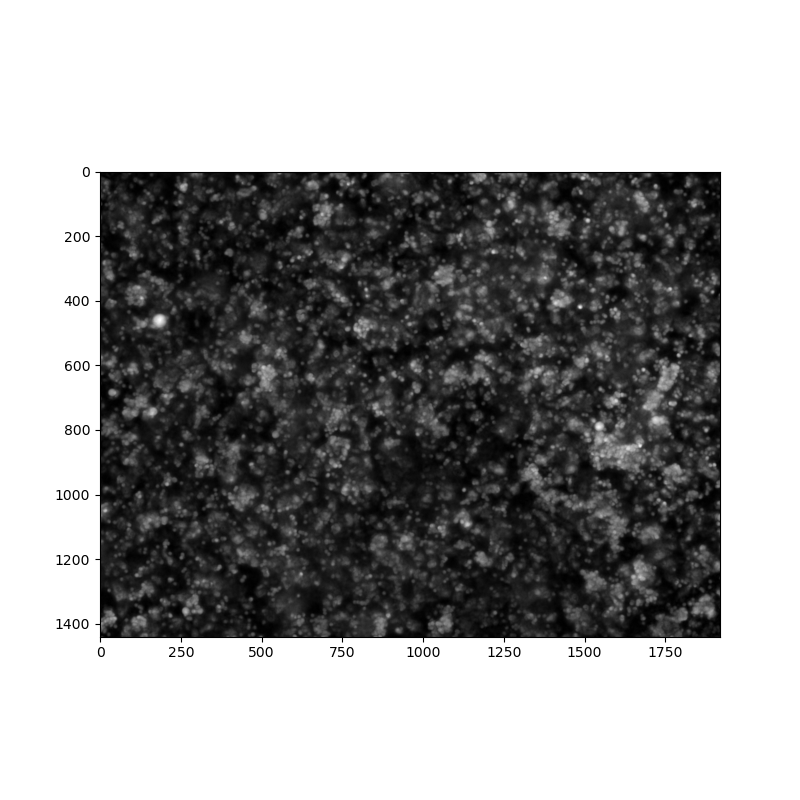

In [15]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(8,8))

im = Image.open(filename)   # +'.tif')
ax.imshow(im, cmap = 'gray')
#im.show()

imarray = np.array(im)
rows, cols = np.shape(imarray)
sys.setrecursionlimit(rows*cols)
med = np.median(imarray)



<IPython.core.display.Javascript object>


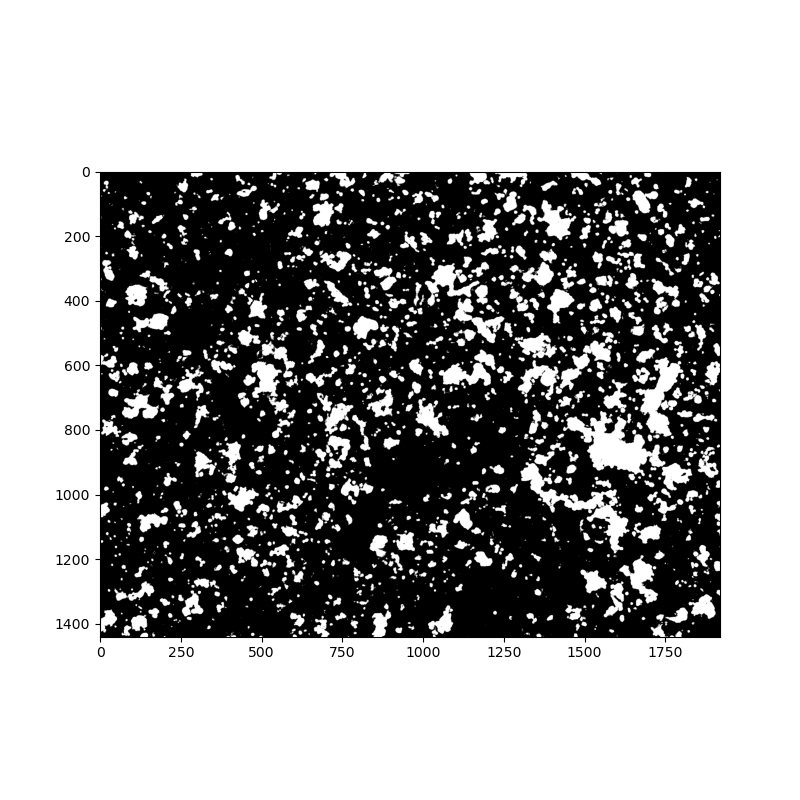

In [16]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(8,8))

thresh = 1.8*med
arraythresh = imarray > thresh
threshimage = Image.fromarray(arraythresh)
ax.imshow(threshimage, cmap = 'gray')
#threshimage.show()
#mark unclustered pixels with -1
arraythresh = -1*(imarray > thresh)

In [1]:
clusters = []

print('working...')
for x in range(rows):
    #if x % 25 == 0:  #progress update
    #    print(100*x/rows)
    for y in range(cols):
        if arraythresh[x,y] == -1:
            #fill in this cluster
            clustersize = floodfill(arraythresh, x, y, rows, cols)
            clusters.append(clustersize)
            #print(clustersize,x,y)
            #mark finished cluster with size
            markcluster(arraythresh,x,y,rows,cols,clustersize)


print(len(clusters), ' clusters detected')
print('maximum cluster size: ', max(clusters))
print('mean cluster size: ', sum(clusters) / len(clusters))
print('average clustering of a pixel: ', sum(sum(arraythresh)) / sum(sum(arraythresh > 0)))


#display detected clusters
norm = arraythresh * 255 / np.max(arraythresh)
arraythresh = norm.astype(np.uint8)

%matplotlib notebook
fig, ax = plt.subplots(figsize=(6,6))

imthresh = Image.fromarray(arraythresh)
ax.imshow(imthresh, cmap = 'gray')
#imthresh.show()
#imthresh.save(filename[:-4] + '_cluster.tif')

working...


NameError: name 'rows' is not defined